In [27]:
from Process import PlateReader
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Load Sample Information
* Ideally will be in the form of a dataframe. This dataframe should be standardized in the original documentation where we originally made the sample. 
* Either load locally or pull from the google team drive (still working on fixing pulling from Drive)

In [15]:
sample_info = pd.read_csv(r"C:\Users\Edwin\Desktop\OT2-DOE\PlanPrepareProcess\05_11_21_CdSe_Sample_Info")
sample_info

,UID,Labware,Slot,Well,CdAc concentration molarity,Se concentration molarity,OleicAc concentration molarity,Oleylamine concentration molarity,CdAc amount mass g,CdAc amount volume uL,...,Se amount volume uL,OleicAc amount mass g,OleicAc amount volume uL,Oleylamine amount mass g,Oleylamine amount volume uL,CdAc-TOP-stock amount volume uL,Se-TOP-stock amount volume uL,OleicAc-stock amount volume uL,Oleylamine-stock amount volume uL,Octadecene-stock volume uL
0,S2_A1_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A1,0.0,0.0,0.00,0.00,0.00000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,5000.000000
1,S2_A2_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A2,0.0,0.0,0.00,0.25,0.00000,0.000000,...,0.0000,0.000000,0.000000,0.334363,411.269988,0.0,0.0,0.000000,411.269988,4588.730012
2,S2_A3_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A3,0.0,0.0,0.00,0.50,0.00000,0.000000,...,0.0000,0.000000,0.000000,0.668725,822.539975,0.0,0.0,0.000000,822.539975,4177.460025
3,S2_A4_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A4,0.0,0.0,0.25,0.00,0.00000,0.000000,...,0.0000,0.353075,396.713483,0.000000,0.000000,0.0,0.0,396.713483,0.000000,4603.286517
4,S2_A5_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A5,0.0,0.0,0.25,0.25,0.00000,0.000000,...,0.0000,0.353075,396.713483,0.334363,411.269988,0.0,0.0,396.713483,411.269988,4192.016529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,S6_A5_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,6,A5,0.1,0.1,0.25,0.25,0.11525,49.252137,...,8.2079,0.353075,396.713483,0.334363,411.269988,1000.0,500.0,396.713483,411.269988,2692.016529
77,S6_A6_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,6,A6,0.1,0.1,0.25,0.50,0.11525,49.252137,...,8.2079,0.353075,396.713483,0.668725,822.539975,1000.0,500.0,396.713483,822.539975,2280.746541
78,S6_B1_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,6,B1,0.1,0.1,0.50,0.00,0.11525,49.252137,...,8.2079,0.706150,793.426966,0.000000,0.000000,1000.0,500.0,793.426966,0.000000,2706.573034
79,S6_B2_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,6,B2,0.1,0.1,0.50,0.25,0.11525,49.252137,...,8.2079,0.706150,793.426966,0.334363,411.269988,1000.0,500.0,793.426966,411.269988,2295.303046


### Step 2: Load UV-Vis Data
* ***If loading from plate reader***: Once the plate has been read, allow for exporting to an excel sheet and reformat for easy upload and merging.
    * The plate reader should automatically ask you if you would like to export to excel. When running multiple plates you can just keep selecting export and it will automatically add the new run as an additional sheet to the originally generated excel sheet. 
    * To format for easy loading:
        1. Create a new sheet in the same exported excel file and name it something simple (i.e. sheet1). 
        2. Copy the data from the sheet and add it to the newly created sheet. Make sure to paste in the data as "only values". 
        3. Repeat for every single exported sheet (i.e. every plate)
         
* Sometimes when using the plate reader the scanning protocol scans the whole plate versus only the wells of interest. This can be changed, however it is common to forget. If you do forget to do this, make sure to trim the dataframe to match the same length/order of wells as the sample info loaded in Step 1.

* ***If loading from single cuvette reader***: 
    * Still documenting.

***Step 2a:*** Provide the path of the excel sheet for the plate reader. With this you will also need to provide the **Sheet Name** of for correct excel sheet to be extracted. Since multiple plates are expected to be used at once, provide the Sheet names as a ***list of string names***. This will return a list of dataframes of each plate in the order the sheet names provided.

In [16]:
path = r"C:\Users\Edwin\Downloads\05_11_21_CdSe_Ligand_unsonicated.xlsx"
plate_names = ['Sheet1']
plate_dfs = PlateReader.extract_plates(path, plate_names)

***Step 2b:*** With the dataframes from ***Step2a***, given that all the plates read originally were done using the same protcol, then we can merge these dataframes into one. The only thing we need to edit is when originally formatting the excel sheets, since we copied the wavelength row in each sheet it only needs to be present once. A way to avoid to this is to copy it only in the first plate sheet you are using. 

Should be length of sample_info + 1 (will remove the wavelength column shortly).

In [18]:
merged_df = PlateReader.merge_wavelength_dfs(plate_dfs)
merged_df

,0,1,2,3,4,5,6,7,8,9,...,691,692,693,694,695,696,697,698,699,700
Wavelength,200,201,202,203,204,205,206,207,208,209,...,891,892,893,894,895,896,897,898,899,900
A1,3.438,3.436,3.45,3.467,3.487,3.493,3.496,3.493,3.486,3.472,...,0.097,0.098,0.099,0.099,0.098,0.098,0.098,0.098,0.098,0.1
A2,3.48,3.481,3.496,3.514,3.539,3.541,3.54,3.54,3.535,3.526,...,0.113,0.114,0.114,0.114,0.113,0.112,0.112,0.112,0.113,0.115
A3,3.532,3.53,3.548,3.575,3.587,3.593,3.6,3.594,3.592,3.587,...,0.148,0.15,0.151,0.15,0.148,0.145,0.144,0.144,0.146,0.149
A4,3.451,3.462,3.472,3.489,3.511,3.522,3.521,3.513,3.51,3.503,...,0.091,0.092,0.092,0.092,0.092,0.092,0.092,0.092,0.092,0.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H8,3.392,3.387,3.401,3.411,3.425,3.435,3.437,3.43,3.421,3.408,...,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081
H9,3.408,3.408,3.418,3.436,3.446,3.458,3.454,3.452,3.439,3.432,...,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.084
H10,3.383,3.385,3.393,3.412,3.42,3.429,3.432,3.425,3.418,3.409,...,0.083,0.083,0.083,0.083,0.083,0.083,0.083,0.083,0.082,0.083
H11,3.397,3.399,3.405,3.424,3.433,3.446,3.452,3.445,3.439,3.428,...,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081


***Step 2c:*** Sometimes when samples are extremely turbid or have some sort of material like foam or cream the plate reader absorbance is overflowed and returns as 'OVRFLW'. This will prevent you from handling the entire set of data, so what can be done is replace the 'OVRFLW' values with a holder number. It is reccomended you select a very high holder number so you can track and isolate it easier if needed. 

In [19]:
merged_df = PlateReader.detect_ovflw(merged_df, holder = 30)
merged_df

,0,1,2,3,4,5,6,7,8,9,...,691,692,693,694,695,696,697,698,699,700
Wavelength,200,201,202,203,204,205,206,207,208,209,...,891,892,893,894,895,896,897,898,899,900
A1,3.438,3.436,3.45,3.467,3.487,3.493,3.496,3.493,3.486,3.472,...,0.097,0.098,0.099,0.099,0.098,0.098,0.098,0.098,0.098,0.1
A2,3.48,3.481,3.496,3.514,3.539,3.541,3.54,3.54,3.535,3.526,...,0.113,0.114,0.114,0.114,0.113,0.112,0.112,0.112,0.113,0.115
A3,3.532,3.53,3.548,3.575,3.587,3.593,3.6,3.594,3.592,3.587,...,0.148,0.15,0.151,0.15,0.148,0.145,0.144,0.144,0.146,0.149
A4,3.451,3.462,3.472,3.489,3.511,3.522,3.521,3.513,3.51,3.503,...,0.091,0.092,0.092,0.092,0.092,0.092,0.092,0.092,0.092,0.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H8,3.392,3.387,3.401,3.411,3.425,3.435,3.437,3.43,3.421,3.408,...,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081
H9,3.408,3.408,3.418,3.436,3.446,3.458,3.454,3.452,3.439,3.432,...,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.084
H10,3.383,3.385,3.393,3.412,3.42,3.429,3.432,3.425,3.418,3.409,...,0.083,0.083,0.083,0.083,0.083,0.083,0.083,0.083,0.082,0.083
H11,3.397,3.399,3.405,3.424,3.433,3.446,3.452,3.445,3.439,3.428,...,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081


# Step 3: Merge with Sample Info Dataframe

The first step to merge to sample info dataframe is to format the plate reader dataframe to have the wavelengths as the column names versus as an another row. We can do this by isolating the Wavelength row, adding the appropiate unit the string of each element of the wavlength row and reassigning this new list as the column names. We finalize this by dropping the wavlength row.

(0.0, 1.0)

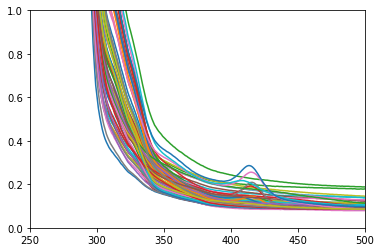

In [50]:
platereader_df = PlateReader.rehead_wavelengths(merged_df)[0:len(sample_info)+1]
samples = platereader_df[:-1]
blank = platereader_df[-1:]
blanked_samples = samples - blank.values
wavelengths = list(range(200,901))
for index, spectra in samples.iterrows():
    spectra = list(spectra)
    plt.plot(wavelengths, spectra)
plt.xlim(250,500)
plt.ylim(0,1)

Next we reset both indexes of the two dataframes we are to merge and concatnate them together. We drop and reset indexes to ensure any past dependency is forgotten, so you must make sure your sample info dataframe and plate reader dataframe are ordered correctly where row 1...n of one dataframe referes to row 1...n of the other. 

In [54]:
spectras = samples
sample_info.reset_index(drop=True, inplace=True)
spectras.reset_index(drop=True, inplace=True)
combined_df = pd.concat([sample_info, spectras], axis = 1) # switch to the dicionary version since you could store a unblanked, blanked and a blanker in one file.
combined_df

,UID,Labware,Slot,Well,CdAc concentration molarity,Se concentration molarity,OleicAc concentration molarity,Oleylamine concentration molarity,CdAc amount mass g,CdAc amount volume uL,...,891nm,892nm,893nm,894nm,895nm,896nm,897nm,898nm,899nm,900nm
0,S2_A1_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A1,0.0,0.0,0.00,0.00,0.00000,0.000000,...,0.097,0.098,0.099,0.099,0.098,0.098,0.098,0.098,0.098,0.1
1,S2_A2_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A2,0.0,0.0,0.00,0.25,0.00000,0.000000,...,0.113,0.114,0.114,0.114,0.113,0.112,0.112,0.112,0.113,0.115
2,S2_A3_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A3,0.0,0.0,0.00,0.50,0.00000,0.000000,...,0.148,0.15,0.151,0.15,0.148,0.145,0.144,0.144,0.146,0.149
3,S2_A4_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A4,0.0,0.0,0.25,0.00,0.00000,0.000000,...,0.091,0.092,0.092,0.092,0.092,0.092,0.092,0.092,0.092,0.093
4,S2_A5_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,2,A5,0.0,0.0,0.25,0.25,0.00000,0.000000,...,0.095,0.096,0.097,0.097,0.097,0.096,0.096,0.096,0.097,0.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,S6_A5_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,6,A5,0.1,0.1,0.25,0.25,0.11525,49.252137,...,0.09,0.091,0.091,0.092,0.092,0.091,0.091,0.091,0.092,0.093
77,S6_A6_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,6,A6,0.1,0.1,0.25,0.50,0.11525,49.252137,...,0.091,0.091,0.092,0.092,0.092,0.092,0.092,0.092,0.092,0.093
78,S6_B1_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,6,B1,0.1,0.1,0.50,0.00,0.11525,49.252137,...,0.09,0.09,0.091,0.091,0.091,0.091,0.091,0.091,0.091,0.092
79,S6_B2_05-14-2021_CdSe,Fischer 24 Well Plate 7400 ÂµL,6,B2,0.1,0.1,0.50,0.25,0.11525,49.252137,...,0.094,0.095,0.096,0.096,0.096,0.096,0.095,0.096,0.096,0.097


# Step 4: Format Dataframe as csv and Upload to Drive.
We simply call a method of the dataframe while ensuring to drop the index (again to remove and previous dependency). 

***If uploading from desktop***: Just grab and upload like any other file.

***If uploading from jupyter notebook***: Save the csv anywhere with a name that is not relevant, reccomended is something like "Temp File" as you will be uploading it to google drive under a different name. Then use the Gdrive module of functions from the Prepare package. Read the README in this package to understand how to use it, it will require a certain setup of credentials. 


In [55]:
temp_hold_path = r"05_11_21_CdSe_Unblanked"
combined_df_csv = combined_df.to_csv(temp_hold_path, index=False)

,Total Volume,CdOl 84mM volpct,TOP 1mM volpct,ZnOl 84mM volpct,Time Sonicated,200nm,205nm,210nm,215nm,220nm,...,855nm,860nm,865nm,870nm,875nm,880nm,885nm,890nm,895nm,900nm
0,5.0,75.0,25.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,5.0,75.0,25.0,0.0,0.0,-0.007,-0.015,-0.007,-0.007,-0.006,...,-0.006,-0.006,-0.006,-0.006,-0.005,-0.006,-0.005,-0.005,-0.005,-0.005
2,5.0,75.0,24.5,0.5,0.0,0.047,0.042,0.052,0.051,0.045,...,-0.007,-0.007,-0.007,-0.007,-0.006,-0.006,-0.006,-0.005,-0.005,-0.005
3,5.0,75.0,24.5,0.5,0.0,0.036,0.036,0.038,0.042,0.040,...,-0.006,-0.006,-0.006,-0.006,-0.004,-0.004,-0.004,-0.003,-0.003,-0.003
4,5.0,75.0,24.0,1.0,0.0,0.027,0.028,0.032,0.038,0.031,...,-0.004,-0.004,-0.004,-0.004,-0.002,-0.003,-0.002,-0.002,-0.002,-0.001
5,5.0,75.0,24.0,1.0,0.0,0.038,0.044,0.046,0.049,0.048,...,-0.005,-0.005,-0.005,-0.005,-0.003,-0.004,-0.003,-0.003,-0.003,-0.002
6,5.0,75.0,20.0,5.0,0.0,0.042,0.044,0.045,0.050,0.048,...,-0.008,-0.008,-0.008,-0.008,-0.006,-0.007,-0.006,-0.006,-0.006,-0.006
7,5.0,75.0,20.0,5.0,0.0,0.046,0.051,0.055,0.055,0.052,...,-0.007,-0.007,-0.007,-0.007,-0.005,-0.006,-0.005,-0.005,-0.005,-0.004
8,5.0,75.0,25.0,0.0,10.0,0.144,0.134,0.148,0.159,0.152,...,-0.005,-0.005,-0.005,-0.005,-0.004,-0.004,-0.003,-0.003,-0.003,-0.003
9,5.0,75.0,25.0,0.0,10.0,0.111,0.101,0.116,0.121,0.116,...,-0.009,-0.008,-0.009,-0.009,-0.008,-0.009,-0.007,-0.007,-0.007,-0.007
